# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [ ]:
import numpy as np


def linan():
  frst = list(map(np.float32, input().split()))
  scnd = list(map(np.float32, input().split()))
  mtrx = np.array([frst[:2], scnd[:2]])
  del scnd[:2]
  scnd.insert(0, frst.pop(2))
  scnd = np.array(scnd)
  sol = np.linalg.solve(mtrx, scnd)
  return np.around(sol[0], 3), np.around(sol[1], 3)


print(linan())

1 2 1
3 4 6
(4.0, -1.5)


# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [ ]:
def decorate_matrix(a):
  mtx = np.ones([a,a])
  mtx[1:a-1,1:a-1] = 0
  print(mtx)

decorate_matrix(5)

[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]


# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [ ]:
from scipy import optimize
import numpy as np


def f(x):
  return ((x + a)**2 - b)


def g(x):
  return abs(f(x))

def minf(fun, start = 0):
  return optimize.minimize(fun, x0=start, method = 'Nelder-Mead').x


a = float(input())
b = float(input())
print(np.around(minf(f), 1))
print(np.around(minf(g), 1))
print(np.around(minf(g, -10), 1))

3
4
[-3.]
[-1.]
[-5.]


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

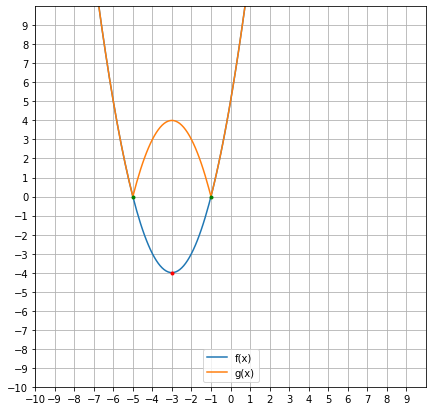

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(-10, 10, 0.1)
plt.figure(figsize=(7, 7))
plt.axis([-10, 10, -10, 10])
plt.yticks(np.arange(-10, 10, step=1))
plt.xticks(np.arange(-10, 10, 1))
plt.grid(True)
plt.plot(x, f(x), label = 'f(x)')
plt.plot(x, g(x), label = 'g(x)')
plt.plot(minf(f), f(minf(f)), marker='o', markersize=3, color="red")
plt.plot(minf(g), g(minf(g)), minf(g, -10), g(minf(g,-10)), marker='o', markersize=3, color="green")
plt.legend(loc='lower center')

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [ ]:
from scipy import special
print(f'{1 - pow((1 - (pow(1/2, 9))), 1000)}')
print(f'{1 - pow((1 - 3/2 ** 9), 1000)}')
print(f'{special.comb(1000, 3) * pow((1 - pow(1/2, 9)), 997) * pow(pow(1/2, 9), 3)}')

0.858440454732242
0.9971957200884372
0.1762873858121736
